Vamos a trabajar con el conjunto de datos global warming dataset, con el objetivo de analizar el calentamiento global.

Importamos el cojunto de datos de https://www.kaggle.com/datasets/globalwarmingdataset/global-warming-dataset

In [2]:
import pandas as pd
import os

# Define la ruta base para mayor claridad
# La 'r' (raw string) al inicio ayuda a manejar las barras invertidas de Windows sin problemas.
base_path = r'C:\Users\miria\Documents\UOC\Visualizacion de datos\PRA_I.ipynb\archive\DA proj'

# Nombres de tus archivos
archivo_1_nombre = 'GlobalLandTemperaturesByCity.csv'
archivo_2_nombre = 'continents2.csv'

# 1. Cargar el primer archivo (Temperaturas por ciudad)
ruta_completa_1 = os.path.join(base_path, archivo_1_nombre)
df_temp_global_city = pd.read_csv(ruta_completa_1)

print(df_temp_global_city.head())


           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  


In [42]:
df_temp_global_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [3]:
# 2. Cargar el segundo archivo (contienentes)
ruta_completa_2 = os.path.join(base_path, archivo_2_nombre)
df_continents = pd.read_csv(ruta_completa_2)

print(df_continents.head())

             name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       Na

Vamos a juntar ambos conjuntos de datos para tener toda la informacion en un mismo dataframe. 

1. Renombramos la columna "name" de df_continents para la union con el df_temp_global_city por la columna "Country"
2. Realizamos inner join para datos limpios y tener los que coinciden 

In [4]:
# 1. Preparación del DataFrame de Continentes
# Seleccionamos las columnas relevantes y renombramos la columna de país
# para que coincida con el nombre que tiene en el DataFrame de temperaturas.
df_continents_ready = df_continents[['name', 'alpha-3', 'region', 'sub-region',]].copy()

# 'name' en df_continents es el nombre del país (country name).
# Lo renombramos a 'Country' para usarlo como clave de unión (key).
df_continents_ready = df_continents_ready.rename(columns={'name': 'Country'})

# 2. Ejecutar el Inner Join
# Realizamos la combinación interna para mantener solo los registros que tienen
# un país coincidente en AMBOS DataFrames.
df_temp_global = pd.merge(
    left=df_temp_global_city,
    right=df_continents_ready,
    on='Country',  # La clave de unión es el País
    how='inner'    # Usamos inner join para datos limpios
)

# 3. Verificación del Resultado
print("Merge (Inner Join) completado correctamente.")
print(f"Número de filas en el nuevo DataFrame: {len(df_temp_global)}")
print("--- Primeras 5 filas con la información de región ---")
print(df_temp_global.head())

# Puedes verificar las nuevas columnas: 'region' y 'sub-region'
print("\n--- Columnas del nuevo DataFrame ---")
print(df_temp_global.columns)

Merge (Inner Join) completado correctamente.
Número de filas en el nuevo DataFrame: 8544044
--- Primeras 5 filas con la información de región ---
           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude alpha-3  region       sub-region  
0  Denmark   57.05N    10.33E     DNK  Europe  Northern Europe  
1  Denmark   57.05N    10.33E     DNK  Europe  Northern Europe  
2  Denmark   57.05N    10.33E     DNK  Europe  Northern Europe  
3  Denmark   57.05N    10.33E     DNK  Europe  Northern Europe  
4  Denmark   57.05N    10.33E     DNK  Europe  Northern Europe  

--- Columnas

In [5]:
# reordenamos las columnas 
nuevo_orden_columnas = [
    'dt',
    'region',        
    'sub-region',                    
    'Country',
    'alpha-3',         
    'City',
    'Latitude',
    'Longitude',
    'AverageTemperature',
    'AverageTemperatureUncertainty'
]

# renombramos columnas alpha -3
try:
    df_temp_global = df_temp_global[nuevo_orden_columnas]
    df_temp_global= df_temp_global.rename(columns={'alpha-3':'CountryCode'})
    print(df_temp_global.columns)
    
except KeyError as e:
    print(f" Error: La columna {e} no existe en el DataFrame.")

Index(['dt', 'region', 'sub-region', 'Country', 'CountryCode', 'City',
       'Latitude', 'Longitude', 'AverageTemperature',
       'AverageTemperatureUncertainty'],
      dtype='object')


In [6]:
# convertimos la columna "dt" para quedarnos con el año y mes 

# 1. Asegurar la conversión a datetime
# Usamos el parámetro 'errors='coerce'' para convertir cualquier valor que no sea una fecha 
# válida en NaT (Not a Time), aunque es poco probable que suceda después del merge.
df_temp_global['dt'] = pd.to_datetime(
    df_temp_global['dt'],
    errors='coerce'
)

# 2. Extraer Año y Mes
# Esto es esencial para el análisis de tendencias y estacionalidad
df_temp_global['Year'] = df_temp_global['dt'].dt.year
df_temp_global['Month'] = df_temp_global['dt'].dt.month

# 3. Eliminar la columna 'dt' si ya no se necesita, o mantenerla.
df_temp_global.drop('dt', axis =1, inplace=True)

# 4. Verificación del resultado
print("✅ Transformación de Fechas completada.")
print("--- Tipos de Datos Actualizados ---")
print(df_temp_global.dtypes)

print("\n--- Primeras filas con las nuevas columnas 'Year' y 'Month' ---")
print(df_temp_global[[ 'Year', 'Month', 'AverageTemperature']].head())

✅ Transformación de Fechas completada.
--- Tipos de Datos Actualizados ---
region                            object
sub-region                        object
Country                           object
CountryCode                       object
City                              object
Latitude                          object
Longitude                         object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Year                               int32
Month                              int32
dtype: object

--- Primeras filas con las nuevas columnas 'Year' y 'Month' ---
   Year  Month  AverageTemperature
0  1743     11               6.068
1  1743     12                 NaN
2  1744      1                 NaN
3  1744      2                 NaN
4  1744      3                 NaN


In [7]:
df_temp_global.head()

,region,sub-region,Country,CountryCode,City,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,Year,Month
0,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,6.068,1.737,1743,11
1,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,NaN,NaN,1743,12
2,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,NaN,NaN,1744,1
3,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,NaN,NaN,1744,2
4,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,NaN,NaN,1744,3


In [8]:
print(f"Número de filas finales: {len(df_temp_global)}")

Número de filas finales: 8544044


Para enriquecer nuestros datos, vamos a importar el cojunto de datos del GDP per capita, PPP (Current international $) de la funete: World Bank Open Data (https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD?end=2024&start=2024&view=map)
 - GDP per capita, PPP (current international $) → PIB per cápita ajustado por paridad de poder adquisitivo (más útil para comparar entre países).

Tambien vamos a importar los datos sobre las emisiones de CO₂ de la funete de datos: Our World in Data. (https://ourworldindata.org/co2-emissions)
Incluye métricas como:
- Emisiones anuales por país.
- Emisiones per cápita.
- Emisiones acumuladas históricas.
- Emisiones ajustadas por consumo.

In [9]:
# Las rutas de tus archivos (que ahora están correctas)
file_PIB = r'C:\Users\miria\Documents\UOC\Visualizacion de datos\PRA_I.ipynb\API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_2546\API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_2546.csv'
file_CO2 = r'C:\Users\miria\Documents\UOC\Visualizacion de datos\PRA_I.ipynb\annual-co2-emissions-per-country\annual-co2-emissions-per-country.csv'

try:
    # 1. CARGAR PIB (SOLUCIÓN)
    # Usamos skiprows=4 para saltar las filas de metadatos del Banco Mundial
    # También especificamos sep=',' por si acaso
    df_pib = pd.read_csv(file_PIB, skiprows=4, sep=',')
    print("✅ Archivo PIB cargado correctamente.")

    # 2. CARGAR CO2 (No tiene problemas)
    df_co2 = pd.read_csv(file_CO2)
    print("✅ Archivo CO2 cargado correctamente.")

except Exception as e:
    print(f"❌ Ocurrió un error al cargar los datos: {e}")
    
# Mostrar el inicio para confirmar que se saltaron los metadatos
print(df_pib.head())
    

✅ Archivo PIB cargado correctamente.
✅ Archivo CO2 cargado correctamente.
                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                  Indicator Name     Indicator Code  1960  \
0  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
1  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
2  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
3  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   
4  GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   NaN   

   1961  1962  1963  1964  1965  ...          2016          2017  \
0   NaN   NaN   NaN   NaN   NaN  ...  36117.508211  37524.928478   
1   NaN   NaN   NaN   NaN   NaN  ...   3551.

In [10]:
print(df_co2.head())

        Entity Code  Year  Annual CO₂ emissions
0  Afghanistan  AFG  1949               14656.0
1  Afghanistan  AFG  1950               84272.0
2  Afghanistan  AFG  1951               91600.0
3  Afghanistan  AFG  1952               91600.0
4  Afghanistan  AFG  1953              106256.0


Vamos a pivotar las columnas a filas del conjunto de datos df_pib

In [11]:
import pandas as pd
import numpy as np

# 1. Renombrar columnas clave (si no lo hiciste antes)
df_pib.rename(columns={
    'Country Name': 'Country',
    'Country Code': 'CountryCode'
}, inplace=True)

# 2. Definir las columnas de identificación y las columnas de valor
# Columnas ID: Las que se mantienen fijas (País, Código)
id_vars = ['Country', 'CountryCode']

# Columnas de Valor: Todas las demás columnas que son años (strings convertibles a números)
value_vars = [col for col in df_pib.columns if col.replace('.', '').isdigit()] 

# 3. Aplicar la transformación (Melt)
df_pib_long = pd.melt(
    df_pib,
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='Year',           # Nombre de la nueva columna que contendrá los años (ej. '1960')
    value_name='GDP_Per_Capita' # Nombre de la nueva columna que contendrá los valores de PIB
)


# 4. Limpieza y Conversión de Tipos de Datos
# Convertir la columna 'Year' a entero
df_pib_long['Year'] = pd.to_numeric(df_pib_long['Year'], errors='coerce').astype('Int64')


# 5. Verificación del Resultado
print("✅ DataFrame PIB transformado a formato largo (pivotado).")
print(f"Filas resultantes: {len(df_pib_long)}")
print("--- df_pib_long Head ---")
print(df_pib_long.head())

✅ DataFrame PIB transformado a formato largo (pivotado).
Filas resultantes: 17290
--- df_pib_long Head ---
                       Country CountryCode  Year  GDP_Per_Capita
0                        Aruba         ABW  1960             NaN
1  Africa Eastern and Southern         AFE  1960             NaN
2                  Afghanistan         AFG  1960             NaN
3   Africa Western and Central         AFW  1960             NaN
4                       Angola         AGO  1960             NaN


Analizamos los valores nulos

In [12]:
# 1. Filtrar las filas que tienen un valor nulo en AverageTemperature
filas_nulos = df_pib_long[df_pib_long['GDP_Per_Capita'].isnull()]

# 2. Agrupar por la columna 'Year' y contar cuántos nulos hay en cada año.
# Usamos .value_counts() directamente sobre la columna 'Year'.
nulos_por_año = filas_nulos['Year'].value_counts().sort_index()

print("\n--- Conteo de valores nulos por Año ---")
print("Este conteo muestra en qué años se concentran los valores nulos.")
nulos_por_año


--- Conteo de valores nulos por Año ---
Este conteo muestra en qué años se concentran los valores nulos.


Year
1960    266
1961    266
1962    266
1963    266
1964    266
       ... 
2020     19
2021     19
2022     19
2023     21
2024     34
Name: count, Length: 65, dtype: Int64

In [13]:
df_co2.isnull().sum()

Entity                     0
Code                    5670
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [14]:
# 1. Renombrar las columnas de df_co2 (si no lo hiciste antes)
df_co2.rename(columns={
    'Entity': 'Country',
    'Code': 'CountryCode',
    'Annual CO₂ emissions': 'Annual_CO2_Emissions' # Asegúrate de usar el nombre exacto de tu columna
}, inplace=True)

# 2. Convertir la columna Year a entero (es crucial para el merge)
# Usamos to_numeric primero para manejar errores en caso de que existan valores no numéricos
df_co2['Year'] = pd.to_numeric(df_co2['Year'], errors='coerce').astype('Int64')

df_co2.head()

,Country,CountryCode,Year,Annual_CO2_Emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


Agregamos los datos por las columnas "Year" y "CountryCode" con el conjunto de datos inicial el cual recoge los datos sobre las temperaturas, con el fin de obtener un conjunto de datos enriquecido que contenga los registros de las temperaturas, pib per capita y emisiones de CO2, por region, pais y ciudad.

In [15]:
# Seleccionamos solo las columnas necesarias para el merge
df_co2_ready = df_co2[['CountryCode', 'Year', 'Annual_CO2_Emissions']].copy()

# Hacemos un inner merge para asegurar que solo tenemos registros que tienen 
# datos de PIB y CO2 en un país y año específico.
df_pib_co2 = pd.merge(
    df_pib_long,
    df_co2_ready,
    on=['CountryCode', 'Year'],
    how='inner'
)

print("Merge 1 completado: PIB y CO2 fusionados.")
print(f"Número de filas después del Merge 1: {len(df_pib_co2)}")
print(df_pib_co2.head())

Merge 1 completado: PIB y CO2 fusionados.
Número de filas después del Merge 1: 12896
                Country CountryCode  Year  GDP_Per_Capita  \
0                 Aruba         ABW  1960             NaN   
1           Afghanistan         AFG  1960             NaN   
2                Angola         AGO  1960             NaN   
3               Albania         ALB  1960             NaN   
4  United Arab Emirates         ARE  1960             NaN   

   Annual_CO2_Emissions  
0              618561.0  
1              413885.0  
2              548951.0  
3             2022231.1  
4               10992.0  


In [16]:
df_temp_pib_co2 = pd.merge(
    df_temp_global, 
    df_pib_co2[['CountryCode', 'Year', 'GDP_Per_Capita', 'Annual_CO2_Emissions']], # Solo las columnas necesarias del lado derecho
    on=['CountryCode', 'Year'],
    how='left' # Usamos left join para mantener todas las filas de temperatura, 
                # y agregar el PIB/CO2 si existe la coincidencia (Country, Year).
)

print("\n Merge 2 completado: Temperaturas, PIB y CO2 fusionados.")
print(f"Número de filas finales: {len(df_temp_pib_co2)}")


 Merge 2 completado: Temperaturas, PIB y CO2 fusionados.
Número de filas finales: 8544044


#### Exploracion del conjunto final de datos

In [17]:
df_temp_pib_co2.head()

,region,sub-region,Country,CountryCode,City,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,Year,Month,GDP_Per_Capita,Annual_CO2_Emissions
0,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,6.068,1.737,1743,11,NaN,NaN
1,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,NaN,NaN,1743,12,NaN,NaN
2,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,NaN,NaN,1744,1,NaN,NaN
3,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,NaN,NaN,1744,2,NaN,NaN
4,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,NaN,NaN,1744,3,NaN,NaN


In [18]:
df_temp_pib_co2.isnull().sum()

region                                 0
sub-region                             0
Country                                0
CountryCode                            0
City                                   0
Latitude                               0
Longitude                              0
AverageTemperature                361070
AverageTemperatureUncertainty     361070
Year                                   0
Month                                  0
GDP_Per_Capita                   7568348
Annual_CO2_Emissions             6316901
dtype: int64

En los conjuntos de datos se ha visto que hasta 1990 no hay apenar registos, por lo que filtra el conjunto de datos final 

In [19]:
# filtramos los datos hasta el año 1990

df = df_temp_pib_co2.copy()

df_temp_filtrado = df[df['Year'] >= 1990].copy()

print(f"✅ Filtrado completado. Número de filas restantes: {len(df_temp_filtrado)}")
print(f"El DataFrame ahora comienza en el año {df_temp_filtrado['Year'].min()}.")

# 3. Contar los valores nulos en el DataFrame filtrado
# Contaremos nulos en las columnas clave:
nulos_despues_filtrado = df_temp_filtrado[['AverageTemperature', 'AverageTemperatureUncertainty', 'GDP_Per_Capita', 'Annual_CO2_Emissions']].isnull().sum()

print("\n--- Conteo de Valores Nulos ---")
print(nulos_despues_filtrado)

✅ Filtrado completado. Número de filas restantes: 994080
El DataFrame ahora comienza en el año 1990.

--- Conteo de Valores Nulos ---
AverageTemperature                3048
AverageTemperatureUncertainty     3048
GDP_Per_Capita                   18384
Annual_CO2_Emissions              9465
dtype: int64


In [20]:
df_temp_filtrado.head()

,region,sub-region,Country,CountryCode,City,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,Year,Month,GDP_Per_Capita,Annual_CO2_Emissions
2954,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,4.267,0.459,1990,1,18227.417105,53476972.0
2955,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,5.895,0.460,1990,2,18227.417105,53476972.0
2956,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,6.565,0.299,1990,3,18227.417105,53476972.0
2957,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,8.068,0.222,1990,4,18227.417105,53476972.0
2958,Europe,Northern Europe,Denmark,DNK,Århus,57.05N,10.33E,12.944,0.287,1990,5,18227.417105,53476972.0


In [21]:
df_temp_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994080 entries, 2954 to 8544043
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   region                         994080 non-null  object 
 1   sub-region                     994080 non-null  object 
 2   Country                        994080 non-null  object 
 3   CountryCode                    994080 non-null  object 
 4   City                           994080 non-null  object 
 5   Latitude                       994080 non-null  object 
 6   Longitude                      994080 non-null  object 
 7   AverageTemperature             991032 non-null  float64
 8   AverageTemperatureUncertainty  991032 non-null  float64
 9   Year                           994080 non-null  int32  
 10  Month                          994080 non-null  int32  
 11  GDP_Per_Capita                 975696 non-null  float64
 12  Annual_CO2_Emissions           

In [22]:
df_temp_filtrado.describe()

,AverageTemperature,AverageTemperatureUncertainty,Year,Month,GDP_Per_Capita,Annual_CO2_Emissions
count,991032.000000,991032.000000,994080.000000,994080.000000,975696.000000,9.846150e+05
mean,18.370864,0.355778,2001.378947,6.452632,13029.595998,1.397586e+09
std,9.893099,0.197809,6.856700,3.437979,12930.514388,2.108215e+09
min,-38.447000,0.040000,1990.000000,1.000000,254.388475,4.396800e+04
25%,12.574000,0.232000,1995.000000,3.000000,3258.402107,1.174008e+08
50%,20.734000,0.309000,2001.000000,6.000000,8096.911492,4.191187e+08
75%,26.266000,0.422000,2007.000000,9.000000,19912.516605,1.490366e+09
max,39.156000,5.181000,2013.000000,12.000000,180939.425775,9.942371e+09


#### Tratamiento de caracteres especiales

En el conjunto de datos se ha visto que algunas columnas contienen valores con caracteres especiales como "Århus", se van a tratar esto valores antes de realizar cualquier merge o visualización.

El método más sencillo es crear una función que busque cualquier carácter que no sea una letra del alfabeto inglés estándar (a-z, A-Z), un número (0-9), o un espacio.

In [23]:
import re

# Usamos el DataFrame df_temp_filtrado (o el nombre que estés usando para el de temperaturas)
df = df_temp_filtrado.copy()

def buscar_caracteres_raros(df, columna):
    """
    Busca valores únicos en una columna que contienen caracteres que no son alfanuméricos básicos.
    """
    # Expresión regular que busca cualquier carácter que NO sea:
    # ^ : NOT
    # a-zA-Z0-9 : letras y números
    # \s : espacios en blanco
    # ,.- : caracteres comunes de puntuación
    patron = r'[^a-zA-Z0-9\s,\.\-]'
    
    # Filtra el DataFrame para las filas que contienen caracteres que coinciden con el patrón
    filas_con_raros = df[df[columna].str.contains(patron, na=False)]
    
    # Devuelve los valores únicos que contienen caracteres raros
    valores_unicos_raros = filas_con_raros[columna].unique()
    
    return valores_unicos_raros

# --- Ejecución ---

print("--- Caracteres Raros en la Columna 'City' ---")
ciudades_raras = buscar_caracteres_raros(df, 'City')
if len(ciudades_raras) > 0:
    print(f"✅ Ciudades con caracteres especiales (primeros 20):")
    print(ciudades_raras[:20])
else:
    print("No se encontraron caracteres especiales en la columna 'City'.")
    
print("\n--- Caracteres Raros en la Columna 'Country' ---")
paises_raros = buscar_caracteres_raros(df, 'Country')
if len(paises_raros) > 0:
    print(f"✅ Países con caracteres especiales (primeros 20):")
    print(paises_raros[:20])
else:
    print("No se encontraron caracteres especiales en la columna 'Country'.")

--- Caracteres Raros en la Columna 'City' ---
✅ Ciudades con caracteres especiales (primeros 20):
['Århus' 'Çorlu' 'Çorum' 'Öskemen' 'Ürümqi' 'A Coruña' 'Acuña'
 'Alcalá De Henares' 'Alcorcón' 'Almería' 'Anápolis' 'Aqtöbe' 'Araçatuba'
 'Araguaína' 'Araucária' 'Asunción' 'Bénin' 'Belém' 'Besançon' 'Biên Hòa']

--- Caracteres Raros en la Columna 'Country' ---
✅ Países con caracteres especiales (primeros 20):
["Côte D'Ivoire" 'Congo (Democratic Republic Of The)']


##### Normalizamos los caracteres encontrados

Usaremos la biblioteca unidecode

In [24]:
! pip install unidecode


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from unidecode import unidecode 

def normalizar_caracteres(texto):
    """Convierte texto con acentos y caracteres especiales a su equivalente ASCII."""
    if pd.isna(texto):
        return texto
    # 1. Normaliza (ej. Århus -> Arhus)
    texto_normalizado = unidecode(str(texto))
    # 2. Opcional: Elimina cualquier carácter que no sea alfanumérico o espacio (limpieza agresiva)
    # texto_final = re.sub(r'[^a-zA-Z0-9\s]', '', texto_normalizado)
    return texto_normalizado.strip()

# Aplicar la normalización a ambas columnas
df['City_Clean'] = df['City'].apply(normalizar_caracteres)
df['Country_Clean'] = df['Country'].apply(normalizar_caracteres)

print("\n--- Resultado de la Normalización (Ejemplo) ---")
# Muestra una comparación para confirmar la limpieza
print(df[['City', 'City_Clean', 'Country', 'Country_Clean']].head())

# sobrescribir las columnas originales si estás seguro de que la limpieza es correcta
df['City'] = df['City_Clean']
df['Country'] = df['Country_Clean']
df.drop(['City_Clean', 'Country_Clean'], axis=1, inplace=True)


--- Resultado de la Normalización (Ejemplo) ---
       City City_Clean  Country Country_Clean
2954  Århus      Arhus  Denmark       Denmark
2955  Århus      Arhus  Denmark       Denmark
2956  Århus      Arhus  Denmark       Denmark
2957  Århus      Arhus  Denmark       Denmark
2958  Århus      Arhus  Denmark       Denmark


In [26]:
df. head()

,region,sub-region,Country,CountryCode,City,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,Year,Month,GDP_Per_Capita,Annual_CO2_Emissions
2954,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,4.267,0.459,1990,1,18227.417105,53476972.0
2955,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,5.895,0.460,1990,2,18227.417105,53476972.0
2956,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,6.565,0.299,1990,3,18227.417105,53476972.0
2957,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,8.068,0.222,1990,4,18227.417105,53476972.0
2958,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,12.944,0.287,1990,5,18227.417105,53476972.0


 Reorganizamos las columnas

In [27]:
# reordenamos las columnas 
nuevo_orden_columnas = [
    'Year',
    'Month',
    'region',        
    'sub-region',                    
    'Country',
    'CountryCode',         
    'City',
    'Latitude',
    'Longitude',
    'AverageTemperature',
    'AverageTemperatureUncertainty',
    'GDP_Per_Capita',
    'Annual_CO2_Emissions'
]

# renombramos columnas alpha -3
try:
    df_final = df[nuevo_orden_columnas]

    print(df_final.columns)
    
except KeyError as e:
    print(f" Error: La columna {e} no existe en el DataFrame.")

Index(['Year', 'Month', 'region', 'sub-region', 'Country', 'CountryCode',
       'City', 'Latitude', 'Longitude', 'AverageTemperature',
       'AverageTemperatureUncertainty', 'GDP_Per_Capita',
       'Annual_CO2_Emissions'],
      dtype='object')


Creamos nueva columna con el promedio anual para la temperatura

In [30]:

df_II = df_final.copy() 

# 1. Calcular la media anual por País y Año
# Usamos .groupby() y .transform('mean') para calcular la media de 
# AverageTemperature para cada combinación única de País y Año, 
# y luego asignar ese valor a cada fila dentro de ese grupo.
df_II['AverageTemperature_year'] = df_II.groupby(['Country', 'Year'])['AverageTemperature'].transform('mean')
df_II['AverageTemperatureUncertainty_year'] = df_II.groupby(['Country', 'Year'])['AverageTemperatureUncertainty'].transform('mean')

# 2. Seleccionar y reordenar las columnas solicitadas
columnas_solicitadas = [
    'Year',
    'Month',
    'region',
    'sub-region',
    'Country',
    'CountryCode',
    'City',
    'Latitude',
    'Longitude',
    'AverageTemperature',
    'AverageTemperatureUncertainty',
    'AverageTemperature_year',
    'AverageTemperatureUncertainty_year',
    'GDP_Per_Capita',
    'Annual_CO2_Emissions'
]

# Aplicar la selección y el orden
df_tpcGlobal = df_II[columnas_solicitadas].copy()

# Mostramos un ejemplo de las columnas clave para confirmar que la media anual es la misma para todos los meses
df_tpcGlobal.head()

,Year,Month,region,sub-region,Country,CountryCode,City,Latitude,Longitude,AverageTemperature,AverageTemperatureUncertainty,AverageTemperature_year,AverageTemperatureUncertainty_year,GDP_Per_Capita,Annual_CO2_Emissions
2954,1990,1,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,4.267,0.459,9.750542,0.317583,18227.417105,53476972.0
2955,1990,2,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,5.895,0.460,9.750542,0.317583,18227.417105,53476972.0
2956,1990,3,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,6.565,0.299,9.750542,0.317583,18227.417105,53476972.0
2957,1990,4,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,8.068,0.222,9.750542,0.317583,18227.417105,53476972.0
2958,1990,5,Europe,Northern Europe,Denmark,DNK,Arhus,57.05N,10.33E,12.944,0.287,9.750542,0.317583,18227.417105,53476972.0


In [43]:
df_tpcGlobal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994080 entries, 2954 to 8544043
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Year                                994080 non-null  int32  
 1   Month                               994080 non-null  int32  
 2   region                              994080 non-null  object 
 3   sub-region                          994080 non-null  object 
 4   Country                             994080 non-null  object 
 5   CountryCode                         994080 non-null  object 
 6   City                                994080 non-null  object 
 7   Latitude                            994080 non-null  object 
 8   Longitude                           994080 non-null  object 
 9   AverageTemperature                  991032 non-null  float64
 10  AverageTemperatureUncertainty       991032 non-null  float64
 11  AverageTemperature_year    

In [31]:

# Define el DataFrame a guardar
df_a_guardar = df_tpcGlobal

# 1. Define la ruta y el nombre del archivo de salida
# Elegimos un nombre que refleje el contenido completo (Temp, PIB, CO2)
nombre_archivo_salida = 'analisis_global_temperatura_pib_co2.csv'

base_pathI = r'C:\Users\miria\Documents\UOC\Visualizacion de datos\PRA_I.ipynb'
ruta_completa = os.path.join(base_pathI, nombre_archivo_salida)

# 2. Guardar el DataFrame
df_a_guardar.to_csv(
    ruta_completa,
    index=False,      # Evita que el índice de filas de Pandas se guarde como una columna innecesaria.
    encoding='utf-8'  # para manejar caracteres especiales (acentos, 'ñ', etc.)
)

print(f"✅ DataFrame guardado correctamente en: {os.path.abspath(ruta_completa)}")

✅ DataFrame guardado correctamente en: C:\Users\miria\Documents\UOC\Visualizacion de datos\PRA_I.ipynb\analisis_global_temperatura_pib_co2.csv


In [37]:
df_tpcGlobal.describe()

,Year,Month,AverageTemperature,AverageTemperatureUncertainty,AverageTemperature_year,AverageTemperatureUncertainty_year,GDP_Per_Capita,Annual_CO2_Emissions
count,994080.000000,994080.000000,991032.000000,991032.000000,994080.000000,994080.000000,975696.000000,9.846150e+05
mean,2001.378947,6.452632,18.370864,0.355778,18.373166,0.356420,13029.595998,1.397586e+09
std,6.856700,3.437979,9.893099,0.197809,6.912957,0.107463,12930.514388,2.108215e+09
min,1990.000000,1.000000,-38.447000,0.040000,-3.368167,0.173917,254.388475,4.396800e+04
25%,1995.000000,3.000000,12.574000,0.232000,13.631613,0.288998,3258.402107,1.174008e+08
50%,2001.000000,6.000000,20.734000,0.309000,17.269355,0.338082,8096.911492,4.191187e+08
75%,2007.000000,9.000000,26.266000,0.422000,25.828545,0.398177,19912.516605,1.490366e+09
max,2013.000000,12.000000,39.156000,5.181000,31.082625,1.872625,180939.425775,9.942371e+09


#### Detección de Valores Extremos y Distribución
Para detectar valores extremos (outliers) y entender cómo se distribuyen las variables clave, utilizaremos Box-plots e Histogramas.

Vamos a analizar las tres variables numéricas clave a nivel global:

- AverageTemperature_year
- GDP_Per_Capita
- Annual_CO2_Emissions

Para esto, usaremos la biblioteca matplotlib para visualización y seaborn para gráficos estadísticos.

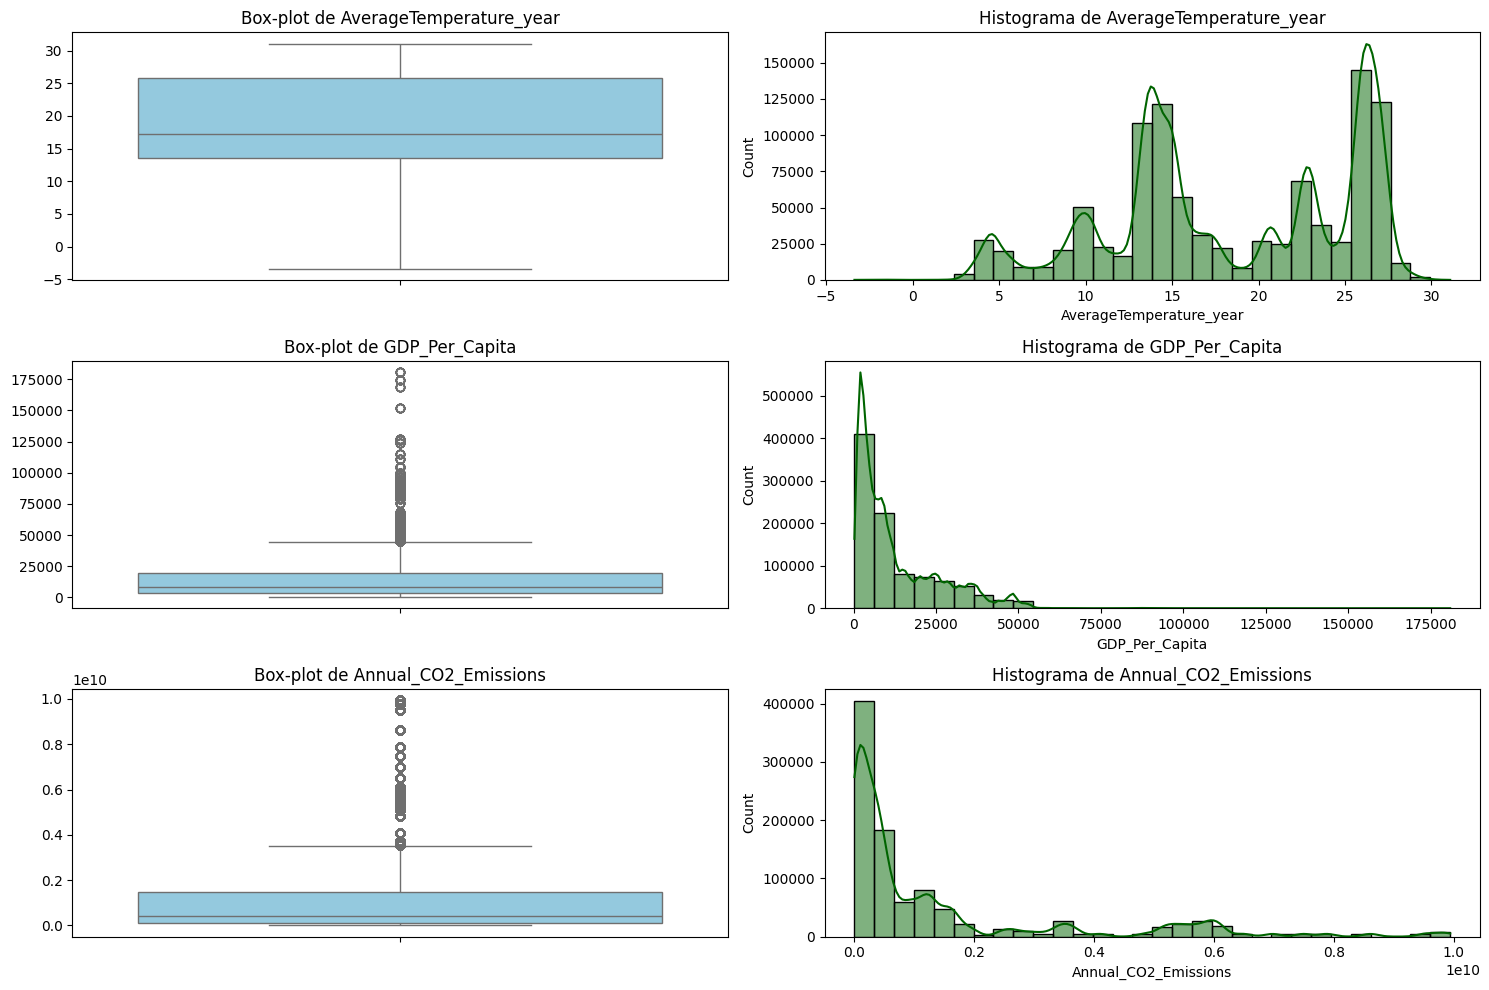

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = df_tpcGlobal
# Crear una lista de las columnas a analizar
variables_analisis = [
    'AverageTemperature_year',
    'GDP_Per_Capita',
    'Annual_CO2_Emissions'
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(variables_analisis):
    # Box-plot (para Outliers)
    plt.subplot(3, 2, 2*i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box-plot de {col}', fontsize=12)
    plt.ylabel('')
    
    # Histograma (para Distribución)
    plt.subplot(3, 2, 2*i + 2)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='darkgreen')
    plt.title(f'Histograma de {col}', fontsize=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##### Análisis de Distribución y Valores Extremos.

1. Temperatura Media Anual (AverageTemperature_year)

- Histograma (Distribución): Muestra una distribución multimodal (con múltiples picos), no una campana normal. Esto es completamente esperado en datos globales.Los picos se corresponden con la latitud. Los valles más bajos representan las zonas templadas o los promedios globales. 
    - Los picos altos y bajos representan las zonas más frías (cerca de los polos o altitudes) y las zonas más cálidas (cerca del ecuador).
- Box-plot (Outliers): Muestra una distribución relativamente simétrica, sin valores extremos significativos. El rango de temperatura media anual global es bastante amplio (desde aproximadamente $-5^{\circ}C$ hasta $28^{\circ}C$).

2. PIB Per Cápita (GDP_Per_Capita)

- Histograma (Distribución): Muestra una asimetría positiva (sesgo a la derecha) extremadamente fuerte. La gran mayoría de las observaciones se agrupan en valores bajos (PIB per cápita bajo), y una cola larga y pequeña se extiende hacia valores muy altos

- Box-plot (Outliers): Muestra una cantidad masiva de valores extremos (outliers). Esto indica la profunda desigualdad económica global. Países muy ricos y/o con economías extremadamente desarrolladas (como Mónaco, Suiza, EE. UU. en ciertos periodos) se posicionan como outliers y distorsionan la media.

3. Emisiones Anuales de CO2 (Annual_CO2_Emissions)

- Histograma (Distribución): Similar al PIB, muestra una fuerte asimetría positiva. La mayoría de los países tienen emisiones anuales bajas, pero hay un grupo muy pequeño de países/años con emisiones extremadamente altas.

- Box-plot (Outliers): Muestra una gran cantidad de valores extremos. Esto es totalmente esperado, ya que las grandes potencias industriales (EE. UU., China, India, etc.) son responsables de la mayor parte de las emisiones de CO2.

#### Correlación entre Temperatura, PIB y CO2

Para ver si existe una relación lineal entre estas variables, vamos a calcular la matriz de correlación de Pearson.

Para esto, usaremos el DataFrame donde cada fila representa un registro único de País/Año, tal como lo preparamos antes (df_correlacion).

In [33]:
# Creamos el DataFrame para la correlación (una fila por Country/Year)
df_correlacion = df_tpcGlobal[[
    'Year',
    'Country',
    'AverageTemperature_year',
    'GDP_Per_Capita',
    'Annual_CO2_Emissions'
]].drop_duplicates().copy()

# Calculamos la Matriz de Correlación
# Solo incluimos columnas numéricas y eliminamos NaN para el cálculo
matriz_correlacion = df_correlacion.dropna().corr(numeric_only=True)

print("--- Matriz de Correlación de Pearson (R) ---")
# Filtramos para mostrar solo las correlaciones relevantes
print(matriz_correlacion[['AverageTemperature_year', 'GDP_Per_Capita', 'Annual_CO2_Emissions']])

--- Matriz de Correlación de Pearson (R) ---
                         AverageTemperature_year  GDP_Per_Capita  \
Year                                    0.019078        0.213102   
AverageTemperature_year                 1.000000       -0.185583   
GDP_Per_Capita                         -0.185583        1.000000   
Annual_CO2_Emissions                   -0.144508        0.128201   

                         Annual_CO2_Emissions  
Year                                 0.034986  
AverageTemperature_year             -0.144508  
GDP_Per_Capita                       0.128201  
Annual_CO2_Emissions                 1.000000  


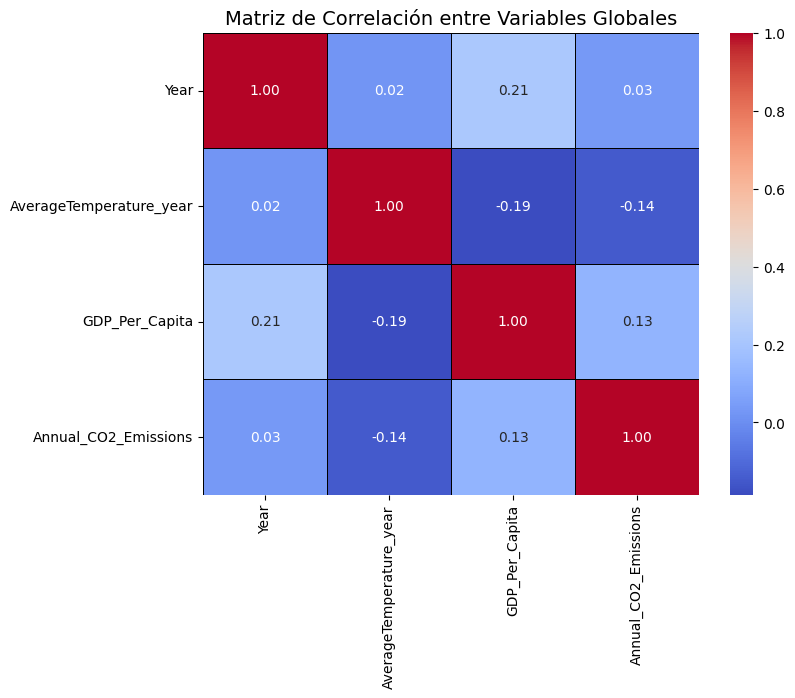

In [34]:
# MAPA DE CALOR
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_correlacion,
    annot=True,
    cmap='coolwarm', # Muestra la dirección (rojo=negativo, azul=positivo)
    fmt=".2f",
    linewidths=.5,
    linecolor='black'
)
plt.title('Matriz de Correlación entre Variables Globales', fontsize=14)
plt.show()

#### Visualización de la Correlación (Scatter Plots)
Para visualizar estas relaciones (o la falta de ellas), usaremos Gráficos de Dispersión (Scatter Plots). Dado que la correlación es débil, una visualización ayuda a entender si hay subgrupos o si la relación es no lineal.

Usaremos el DataFrame df_correlacion (una fila por País/Año) y seaborn.

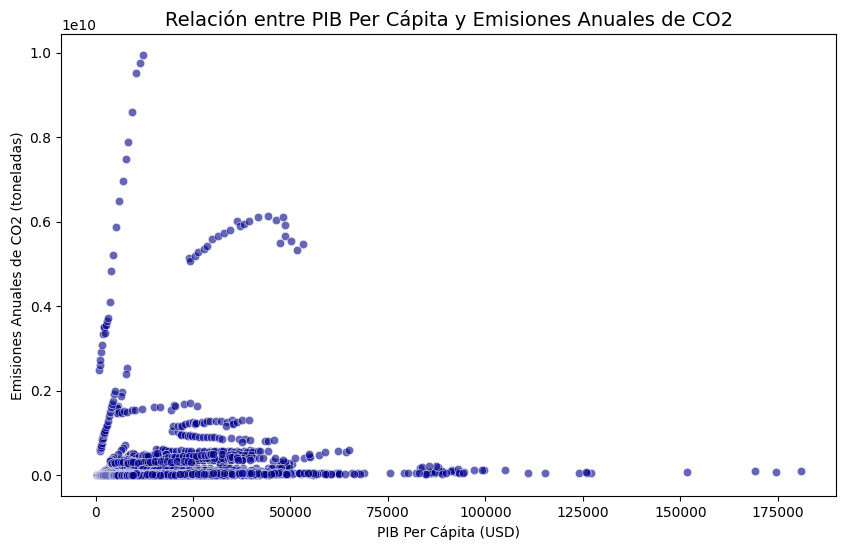

In [ ]:
# PIB VS CO2
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_correlacion,
    x='GDP_Per_Capita',
    y='Annual_CO2_Emissions',
    alpha=0.6,
    color='darkblue'
)
plt.title('Relación entre PIB Per Cápita y Emisiones Anuales de CO2', fontsize=14)
plt.xlabel('PIB Per Cápita (USD)')
plt.ylabel('Emisiones Anuales de CO2 (toneladas)')
plt.show()

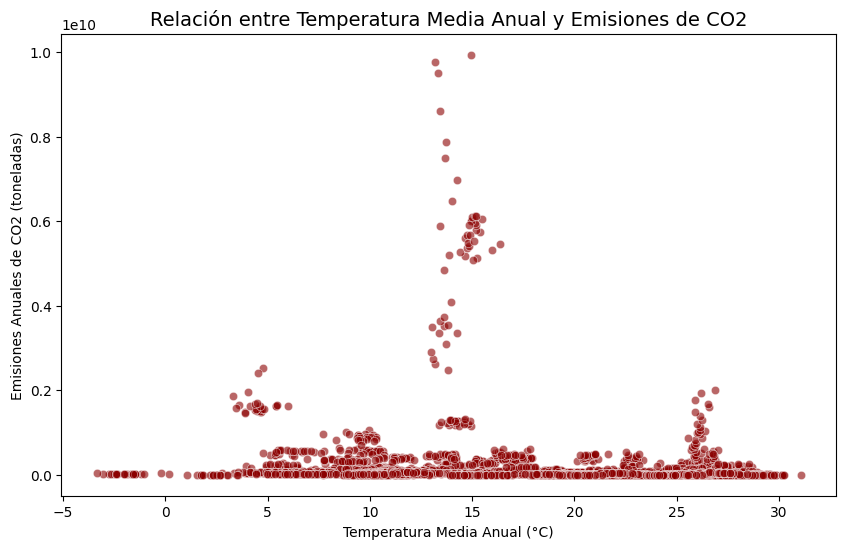

In [36]:
# TEMPERATURA VS CO2
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_correlacion,
    x='AverageTemperature_year',
    y='Annual_CO2_Emissions',
    alpha=0.6,
    color='darkred'
)
plt.title('Relación entre Temperatura Media Anual y Emisiones de CO2', fontsize=14)
plt.xlabel('Temperatura Media Anual (°C)')
plt.ylabel('Emisiones Anuales de CO2 (toneladas)')
plt.show()

#### Extraccin de caracteristicas

Para detectar el calentamiento global, necesitamos eliminar el efecto de la latitud (cuánto se desvía la temperatura de un año respecto a la media histórica de ese mismo país).

Extracción de Características Avanzada:

- Calcular la Media Histórica Base: Encuentra la temperatura media de cada país durante todo el periodo
- Calcular la Anomalía: Resta la temperatura media anual de la temperatura media histórica base.

In [38]:
# 1. Calcular la media histórica (baseline) de temperatura para cada país
media_base_pais = df_correlacion.groupby('Country')['AverageTemperature_year'].mean().reset_index()
media_base_pais.rename(columns={'AverageTemperature_year': 'Baseline_Temp'}, inplace=True)

# 2. Unir la media base de nuevo al DataFrame
df_correlacion = pd.merge(df_correlacion, media_base_pais, on='Country', how='left')

# 3. Calcular la ANOMALÍA DE TEMPERATURA
df_correlacion['Temperature_Anomaly'] = df_correlacion['AverageTemperature_year'] - df_correlacion['Baseline_Temp']

print("\n--- Correlación de la Anomalía de Temperatura con el Año ---")
# Ahora, vamos a correlacionar la Anomalía con el Año: ¡Este debería ser el verdadero indicador de calentamiento!
correlacion_anomalia = df_correlacion[['Year', 'Temperature_Anomaly']].dropna().corr()
print(correlacion_anomalia)


--- Correlación de la Anomalía de Temperatura con el Año ---
                         Year  Temperature_Anomaly
Year                 1.000000             0.384329
Temperature_Anomaly  0.384329             1.000000


In [39]:
df_correlacion.head()

,Year,Country,AverageTemperature_year,GDP_Per_Capita,Annual_CO2_Emissions,Baseline_Temp,Temperature_Anomaly
0,1990,Denmark,9.750542,18227.417105,53476972.0,8.899145,0.851397
1,1991,Denmark,8.592667,19054.942173,64104610.0,8.899145,-0.306478
2,1992,Denmark,9.369000,19817.868708,58326548.0,8.899145,0.469855
3,1993,Denmark,8.058292,20203.675939,60573716.0,8.899145,-0.840853
4,1994,Denmark,8.955000,21654.902569,64673270.0,8.899145,0.055855


In [44]:
df_correlacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     3744 non-null   int32  
 1   Country                  3744 non-null   object 
 2   AverageTemperature_year  3744 non-null   float64
 3   GDP_Per_Capita           3568 non-null   float64
 4   Annual_CO2_Emissions     3691 non-null   float64
 5   Baseline_Temp            3744 non-null   float64
 6   Temperature_Anomaly      3744 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 190.3+ KB


#### Visualizar la Anomalía de Temperatura

Para obtener una visión clara de la tendencia global, primero necesitamos calcular la media global de la anomalía de temperatura para cada año.

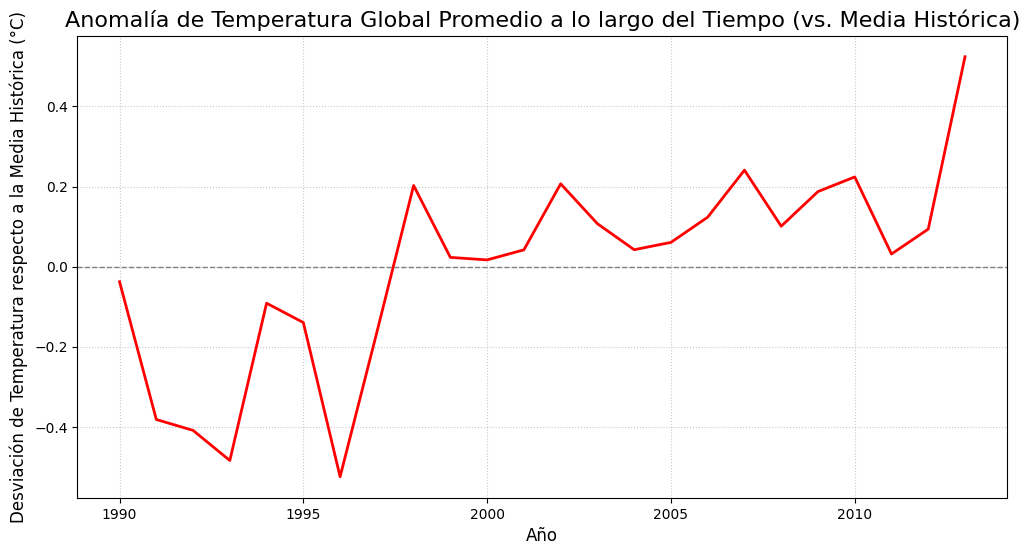

In [40]:
# Usaremos el DataFrame que contiene la Anomalía de Temperatura (df_correlacion)

# 1. Calcular la media global de la anomalía por año (para ver la tendencia mundial)
df_anomalia_global = df_correlacion.groupby('Year')['Temperature_Anomaly'].mean().reset_index()

# 2. Visualización de la Serie Temporal de la Anomalía
plt.figure(figsize=(12, 6))

# Usamos un gráfico de línea para ver la tendencia a lo largo del tiempo
sns.lineplot(
    data=df_anomalia_global,
    x='Year',
    y='Temperature_Anomaly',
    color='red',
    linewidth=2
)

# Añadimos una línea de referencia en 0 (la media histórica base)
plt.axhline(0, color='grey', linestyle='--', linewidth=1)

plt.title('Anomalía de Temperatura Global Promedio a lo largo del Tiempo (vs. Media Histórica)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Desviación de Temperatura respecto a la Media Histórica (°C)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

In [41]:
# Define el DataFrame a guardar
df_a_guardar2 = df_correlacion

# 1. Define la ruta y el nombre del archivo de salida
# Elegimos un nombre que refleje el contenido completo (Temp, PIB, CO2)
nombre_archivo_salida = 'analisis_anomalia_global_temperatura.csv'

base_pathI = r'C:\Users\miria\Documents\UOC\Visualizacion de datos\PRA_I.ipynb'
ruta_completa = os.path.join(base_pathI, nombre_archivo_salida)

# 2. Guardar el DataFrame
df_a_guardar2.to_csv(
    ruta_completa,
    index=False,      # Evita que el índice de filas de Pandas se guarde como una columna innecesaria.
    encoding='utf-8'  # para manejar caracteres especiales (acentos, 'ñ', etc.)
)

print(f"✅ DataFrame guardado correctamente en: {os.path.abspath(ruta_completa)}")

✅ DataFrame guardado correctamente en: C:\Users\miria\Documents\UOC\Visualizacion de datos\PRA_I.ipynb\analisis_anomalia_global_temperatura.csv
